In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib widget

In [2]:
df_social = pd.read_table('./data/higgs-social_network.edgelist', sep = ' ', names = ['A', 'B'])

In [3]:
df_mention = pd.read_table('./data/higgs-mention_network.edgelist', sep = ' ', names = ['A', 'B', 'w'])

In [4]:
df_retweet = pd.read_table('./data/higgs-retweet_network.edgelist', sep = ' ', names = ['A', 'B', 'w'])

In [5]:
df_reply = pd.read_table('./data/higgs-reply_network.edgelist', sep = ' ', names = ['A', 'B', 'w'])

In [6]:
import pickle
import time

In [7]:
start = time.time()

with open('./pickles/G_social_DiGraph.pickle', 'rb') as file:
    G_social = pickle.load(file)

end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

23.452914476394653 seconds
0.3908819079399109 min


In [8]:
import metrics

In [9]:
with open('./pickles/all_metrics.pickle', 'rb') as file:
    all_metrics = pickle.load(file)

In [10]:
all_metrics.keys()

dict_keys(['f1', 'f3', 'm1', 'm2', 'm3', 'm4', 'rt1', 'rt2', 'rt3', 'rp1', 'rp3'])

In [11]:
# Metrics stored in dataframe
df_metrics = pd.DataFrame()
df_metrics['nodeId'] = G_social.nodes()

from utilities import list_of_values

for key in all_metrics.keys():
    df_metrics[key] = list_of_values(all_metrics[key])
df_metrics

,nodeId,f1,f3,m1,m2,m3,m4,rt1,rt2,rt3,rp1,rp3
1,1,16280,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4707,77,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0
3,3,137,25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,8643,402,7.0,6.0,106.0,104.0,7.0,86.0,77.0,1.0,3.0
5,5,2194,58,0.0,0.0,4.0,4.0,0.0,24.0,24.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
456622,456622,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
456623,456623,0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456624,456624,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456625,456625,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axe

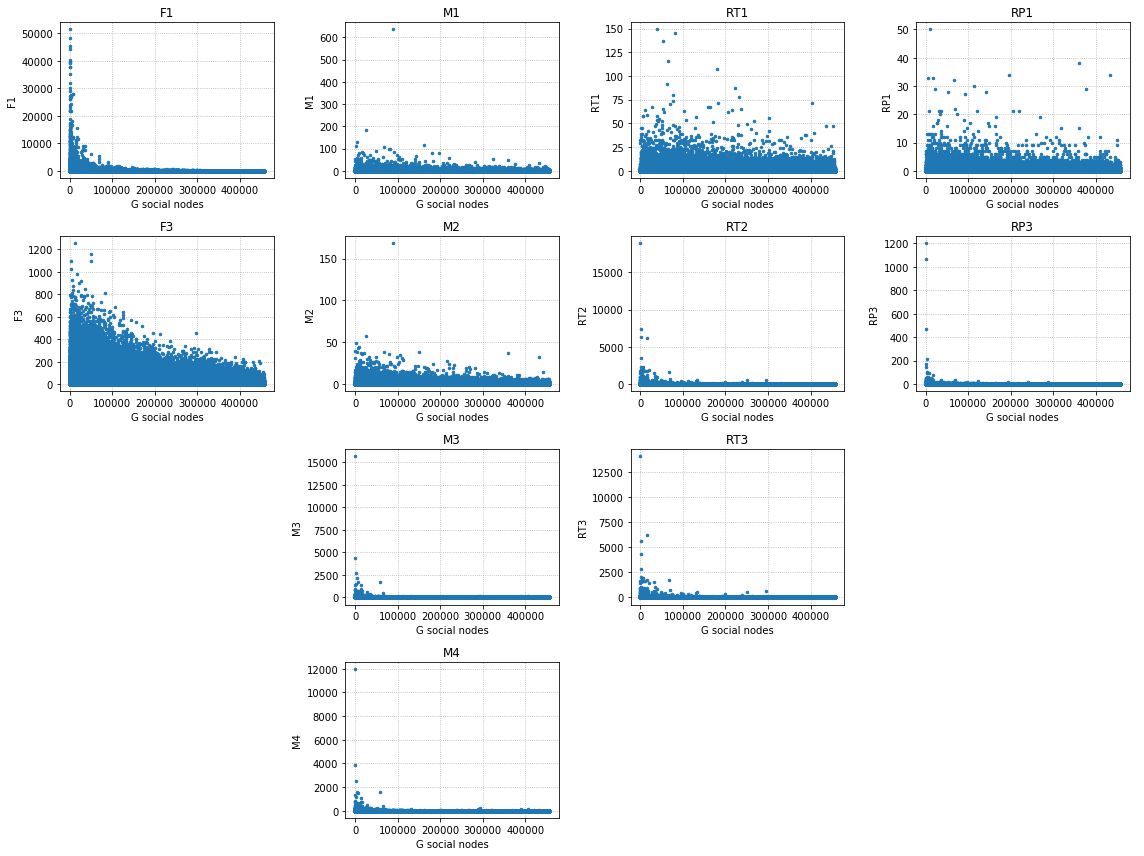

In [12]:
plt.close('all')
fig, axs = plt.subplots(4,4, figsize=(2.5* 6.4, 2.5*4.8),tight_layout = True)#,dpi = 300)

axs[0][0].set_title('F1')
axs[1][0].set_title('F3')
for i in [0,1,2,3]:
    axs[i][1].set_title(f'M{i+1}')
axs[0][2].set_title('RT1')
axs[1][2].set_title('RT2')
axs[2][2].set_title('RT3')
axs[0][3].set_title('RP1')
axs[1][3].set_title('RP3')

for i in axs:
    for j in i:
        j.set_xlabel('G social nodes')
        j.grid(ls = ':')

node_size_factor = 5

axs[0][0].plot(df_metrics.nodeId, df_metrics.f1, '.', markersize = node_size_factor)
axs[0][0].set_ylabel('F1')

axs[1][0].plot(df_metrics.nodeId, df_metrics.f3, '.', markersize = node_size_factor)
axs[1][0].set_ylabel('F3')

axs[2][0].axis('off')
axs[3][0].axis('off')

axs[0][1].plot(df_metrics.nodeId, df_metrics.m1, '.', markersize = node_size_factor)
axs[0][1].set_ylabel('M1')

axs[1][1].plot(df_metrics.nodeId, df_metrics.m2, '.', markersize = node_size_factor)
axs[1][1].set_ylabel('M2')

axs[2][1].plot(df_metrics.nodeId, df_metrics.m3, '.', markersize = node_size_factor)
axs[2][1].set_ylabel('M3')

axs[3][1].plot(df_metrics.nodeId, df_metrics.m4, '.', markersize = node_size_factor)
axs[3][1].set_ylabel('M4')

axs[0][2].plot(df_metrics.nodeId, df_metrics.rt1, '.', markersize = node_size_factor)
axs[0][2].set_ylabel('RT1')

axs[1][2].plot(df_metrics.nodeId, df_metrics.rt2, '.', markersize = node_size_factor)
axs[1][2].set_ylabel('RT2')

axs[2][2].plot(df_metrics.nodeId, df_metrics.rt3, '.', markersize = node_size_factor)
axs[2][2].set_ylabel('RT3')

axs[3][2].axis('off')

axs[0][3].plot(df_metrics.nodeId, df_metrics.rp1, '.', markersize = node_size_factor)
axs[0][3].set_ylabel('RP1')

axs[1][3].plot(df_metrics.nodeId, df_metrics.rp3, '.', markersize = node_size_factor)
axs[1][3].set_ylabel('RP3')

axs[2][3].axis('off')
axs[3][3].axis('off')
fig.savefig('./plots/metrics.png', dpi = 300)

In [13]:
import measures

In [14]:
# betweeness
with open('./pickles/betweeness_dictk10.pickle', 'rb') as file:
    betweeness_dict = pickle.load(file)

In [15]:
# eigencector centrality
with open('./pickles/eigenvector_dict_tol1e02.pickle', 'rb') as file:
    eigenvector_dict = pickle.load(file)

In [16]:
# pagerank centrality
with open('./pickles/pagerank_dict_tol1e02.pickle', 'rb') as file:
    pagerank_dict = pickle.load(file)

In [17]:
# degree centrality
start = time.time()
degc_dict = nx.degree_centrality(G_social)
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

3.169980764389038 seconds
0.0528330127398173 min


In [18]:
#  followerRank
start = time.time()
followerRank_dict = measures.follower_rank(G_social,
                                           all_metrics['f1'], 
                                           all_metrics['f3'])
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.40502238273620605 seconds
0.006750373045603434 min


In [19]:
# TFF
start = time.time()
tff_dict = measures.tff(G_social,
                        all_metrics['f1'],
                        all_metrics['f3'])
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.21968817710876465 seconds
0.003661469618479411 min


In [20]:
# popularity
start = time.time()
pop_dict = measures.popularity(G_social,
                               all_metrics['f1'])
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.660261869430542 seconds
0.011004364490509034 min


In [21]:
# A-score
start = time.time()
a_score_dict = measures.a_score(G_social, 
                                all_metrics['f1'],
                                all_metrics['m4'],
                                all_metrics['rp3'], 
                                all_metrics['rt3'])
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.7899315357208252 seconds
0.013165525595347087 min


In [22]:
# RI
start = time.time()
retweet_impact_dict = measures.retweet_impact(G_social,
                                              all_metrics['rt2'],
                                              all_metrics['rt3'])
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.16499090194702148 seconds
0.0027498483657836916 min


In [23]:
# MI
start = time.time()
mention_impact_dict = measures.mention_impact(G_social,
                                              all_metrics['m1'],
                                              all_metrics['m2'], 
                                              all_metrics['m3'], 
                                              all_metrics['m4'])
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.17006397247314453 seconds
0.0028343995412190757 min


In [24]:
# in_degree centrality
start = time.time()

in_degc_dict = nx.in_degree_centrality(G_social)

end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

0.24997568130493164 seconds
0.004166261355082194 min


In [25]:
df_social_centralities = pd.DataFrame()

cols = ['degc', 
        'indegc',
        'betwc',
        'eigenvectorc',
        'pagerankc',
        'follower_rank',
        'tff',
        'popularity',
        'a_score',
        'retweet_imp',
        'mention_imp']

dicts = [degc_dict, 
         in_degc_dict,
         betweeness_dict,
         eigenvector_dict,
         pagerank_dict,
         followerRank_dict,
         tff_dict,
         pop_dict,
         a_score_dict,
         retweet_impact_dict,
         mention_impact_dict]

df_social_centralities['nodeId'] = G_social.nodes()
for col, dicti in zip(cols, dicts):
    df_social_centralities[col] = list_of_values(dicti)
df_social_centralities

,nodeId,degc,indegc,betwc,eigenvectorc,pagerankc,follower_rank,tff,popularity,a_score,retweet_imp,mention_imp
1,1,0.035701,0.035653,2.600515e-05,0.069014,3.023522e-02,0.998650,740.000000,1.0,16280.000000,1.000000,1.000000
2,2,0.010477,0.010308,7.525704e-05,0.019957,2.317112e-04,0.983905,61.129870,1.0,4710.000000,1.000000,1.000000
3,3,0.000355,0.000300,5.024058e-07,0.000585,5.675661e-06,0.845679,5.480000,1.0,137.000000,1.000000,1.000000
4,4,0.019808,0.018928,7.316571e-04,0.036641,3.825706e-04,0.955556,21.500000,1.0,8750.000169,373.567266,479.763119
5,5,0.004932,0.004805,9.724488e-06,0.009304,7.903862e-05,0.974245,37.827586,1.0,2199.000053,76.273292,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
456622,456622,0.000004,0.000000,0.000000e+00,0.000004,3.284964e-07,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
456623,456623,0.000026,0.000000,0.000000e+00,0.000004,3.284964e-07,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
456624,456624,0.000002,0.000000,0.000000e+00,0.000004,3.284964e-07,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
456625,456625,0.000002,0.000000,0.000000e+00,0.000004,3.284964e-07,0.000000,0.000000,0.0,0.000000,1.000000,1.000000


In [26]:
# top 1000 nodes for each measure
top_follower_rank = set(df_social_centralities.sort_values(by = 'follower_rank', ascending = False).head(1000).nodeId)
top_tff = set(df_social_centralities.sort_values(by = 'tff', ascending = False).head(1000).nodeId)
top_popularity = set(df_social_centralities.sort_values(by = 'popularity', ascending = False).head(1000).nodeId)
top_a_score = set(df_social_centralities.sort_values(by = 'a_score', ascending = False).head(1000).nodeId)
top_retweet_imp = set(df_social_centralities.sort_values(by = 'retweet_imp', ascending = False).head(1000).nodeId)
top_mention_imp = set(df_social_centralities.sort_values(by = 'mention_imp', ascending = False).head(1000).nodeId)
top_mention_imp = set(df_social_centralities.sort_values(by = 'mention_imp', ascending = False).head(1000).nodeId)
top_pagerank = set(df_social_centralities.sort_values(by = 'pagerankc', ascending = False).head(1000).nodeId)
top_degc = set(df_social_centralities.sort_values(by = 'degc', ascending = False).head(1000).nodeId)
top_betw = set(df_social_centralities.sort_values(by = 'betwc', ascending = False).head(1000).nodeId)
top_eigc = set(df_social_centralities.sort_values(by = 'eigenvectorc', ascending = False).head(1000).nodeId)
top_indegc = set(df_social_centralities.sort_values(by = 'indegc', ascending = False).head(1000).nodeId)

In [27]:
top_1000_nodes_for_each_measure = top_degc.union(top_betw) \
                                          .union(top_eigc) \
                                          .union(top_pagerank) \
                                          .union(top_retweet_imp) \
                                          .union(top_indegc) \
                                          .union(top_tff) \
                                          .union(top_mention_imp) \
                                          .union(top_a_score)

In [28]:
len(top_1000_nodes_for_each_measure)

3581

In [29]:
top_1000_nodes = list(top_1000_nodes_for_each_measure)
G_top_1000_nodes = G_social.subgraph(top_1000_nodes)

In [30]:
start = time.time()

nd_positions = nx.spring_layout(G_top_1000_nodes)

end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

77.59018683433533 seconds
1.2931697805722555 min


In [31]:
# z score normalization
df = pd.DataFrame()
df['nodeId'] = top_1000_nodes

cols = list(df_social_centralities.columns)
cols.remove('nodeId')

dicts = [degc_dict, 
         in_degc_dict,
         betweeness_dict,
         eigenvector_dict,
         pagerank_dict,
         followerRank_dict,
         tff_dict,
         pop_dict,
         a_score_dict,
         retweet_impact_dict,
         mention_impact_dict
        ]

for col, dicti in zip(cols, dicts):
    df[col] = [dicti[node] for node in list(top_1000_nodes)]

# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,nodeId,degc,indegc,betwc,eigenvectorc,pagerankc,follower_rank,tff,popularity,a_score,...,indegc_zscore,betwc_zscore,eigenvectorc_zscore,pagerankc_zscore,follower_rank_zscore,tff_zscore,popularity_zscore,a_score_zscore,retweet_imp_zscore,mention_imp_zscore
0,65536,0.000876,0.000795,4.592485e-08,0.001543,0.000062,0.907500,9.810811,1.0,372.000151,...,-0.333959,-0.236346,-0.333959,-0.091705,0.447262,-0.167347,0.059718,-0.329970,-0.029327,-0.052242
1,1,0.035701,0.035653,2.600515e-05,0.069014,0.030235,0.998650,740.000000,1.0,16280.000000,...,4.158847,-0.219675,4.158847,50.893946,0.828230,0.589924,0.059718,4.025314,-0.115891,-0.052242
2,2,0.010477,0.010308,7.525704e-05,0.019957,0.000232,0.983905,61.129870,1.0,4710.000000,...,0.892199,-0.188045,0.892199,0.194497,0.766600,-0.114124,0.059718,0.857686,-0.115891,-0.052242
3,4,0.019808,0.018928,7.316571e-04,0.036641,0.000383,0.955556,21.500000,1.0,8750.000169,...,2.003192,0.233500,2.003192,0.449416,0.648113,-0.155224,0.059718,1.963755,-0.014011,0.130454
4,5,0.004932,0.004805,9.724488e-06,0.009304,0.000079,0.974245,37.827586,1.0,2199.000053,...,0.182868,-0.230131,0.182868,-0.063487,0.726227,-0.138291,0.059718,0.170225,-0.095307,-0.052242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,65520,0.000561,0.000250,6.919265e-04,0.000487,0.000004,0.445312,0.802817,1.0,114.000002,...,-0.404243,0.207985,-0.404243,-0.189455,-1.484478,-0.176689,0.059718,-0.400605,-0.116165,-0.052242
3577,16368,0.001848,0.001152,6.575428e-04,0.002234,0.000017,0.623223,1.654088,1.0,527.000011,...,-0.287950,0.185903,-0.287950,-0.167997,-0.740892,-0.175806,0.059718,-0.287534,-0.113964,-0.052242
3578,40950,0.001629,0.001459,1.722673e-05,0.002827,0.000087,0.895161,8.538462,1.0,666.000000,...,-0.248433,-0.225313,-0.248433,-0.049743,0.395691,-0.168666,0.059718,-0.249478,-0.115891,-0.052242
3579,90107,0.002177,0.002155,1.344142e-06,0.004175,0.000199,0.989940,98.400000,1.0,987.000044,...,-0.158673,-0.235513,-0.158673,0.138547,0.791823,-0.075472,0.059718,-0.161595,-0.098962,-0.052242


In [32]:
from utilities import normalize_vector, factor_vector

In [33]:
# minmax normalization

scaling_factor = 1000.0
top_1000_followerRank_normalized = [followerRank_dict[node] for node in list(top_1000_nodes)]
top_1000_followerRank_normalized= normalize_vector(top_1000_followerRank_normalized)
top_1000_followerRank_normalized = factor_vector(top_1000_followerRank_normalized, scaling_factor)

top_1000_tff_normalized = [tff_dict[node] for node in list(top_1000_nodes)]
top_1000_tff_normalized= normalize_vector(top_1000_tff_normalized)
top_1000_tff_normalized = factor_vector(top_1000_tff_normalized, scaling_factor)

top_1000_popularity_normalized = [pop_dict[node] for node in list(top_1000_nodes)]
top_1000_popularity_normalized= normalize_vector(top_1000_popularity_normalized)
top_1000_popularity_normalized = factor_vector(top_1000_popularity_normalized, scaling_factor)

top_1000_a_score_normalized = [a_score_dict[node] for node in list(top_1000_nodes)]
top_1000_a_score_normalized= normalize_vector(top_1000_a_score_normalized)
top_1000_a_score_normalized = factor_vector(top_1000_a_score_normalized, scaling_factor)

top_1000_retweet_impact_normalized = [retweet_impact_dict[node] for node in list(top_1000_nodes)]
top_1000_retweet_impact_normalized= normalize_vector(top_1000_retweet_impact_normalized)
top_1000_retweet_impact_normalized = factor_vector(top_1000_retweet_impact_normalized, scaling_factor)

top_1000_mention_impact_normalized = [mention_impact_dict[node] for node in list(top_1000_nodes)]
top_1000_mention_impact_normalized= normalize_vector(top_1000_mention_impact_normalized)
top_1000_mention_impact_normalized = factor_vector(top_1000_mention_impact_normalized, scaling_factor)

top_1000_pagerank_normalized = [pagerank_dict[node] for node in list(top_1000_nodes)]
top_1000_pagerank_normalized= normalize_vector(top_1000_pagerank_normalized)
top_1000_pagerank_normalized = factor_vector(top_1000_pagerank_normalized, scaling_factor)

top_1000_degc_normalized = [degc_dict[node] for node in list(top_1000_nodes)]
top_1000_degc_normalized= normalize_vector(top_1000_degc_normalized)
top_1000_degc_normalized = factor_vector(top_1000_degc_normalized, scaling_factor)

top_1000_betwc_normalized = [betweeness_dict[node] for node in list(top_1000_nodes)]
top_1000_betwc_normalized= normalize_vector(top_1000_betwc_normalized)
top_1000_betwc_normalized = factor_vector(top_1000_betwc_normalized, scaling_factor)

top_1000_eigc_normalized = [eigenvector_dict[node] for node in list(top_1000_nodes)]
top_1000_eigc_normalized= normalize_vector(top_1000_eigc_normalized)
top_1000_eigc_normalized = factor_vector(top_1000_eigc_normalized, scaling_factor)

top_1000_indegc_normalized = [in_degc_dict[node] for node in list(top_1000_nodes)]
top_1000_indegc_normalized= normalize_vector(top_1000_indegc_normalized)
top_1000_indegc_normalized = factor_vector(top_1000_indegc_normalized, scaling_factor)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


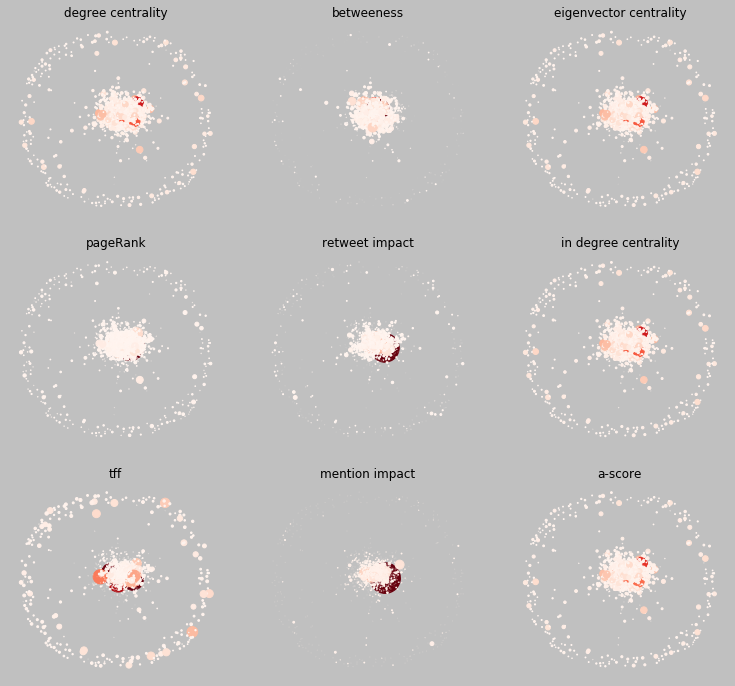

In [34]:
plt.close('all')
fig, axs = plt.subplots(3,3, figsize=(2* 6.4, 2.5*4.8))#,dpi = 300)

fig.patch.set_facecolor('silver')

titles = ['degree centrality',
          'betweeness',
          'eigenvector centrality', 
          'pageRank', 
          'retweet impact',
          'in degree centrality',
          'tff', 
          'mention impact',
          'a-score']

data = [top_1000_degc_normalized,
        top_1000_betwc_normalized,
        top_1000_eigc_normalized, 
        top_1000_pagerank_normalized, 
        top_1000_retweet_impact_normalized, 
        top_1000_indegc_normalized, 
        top_1000_tff_normalized, 
        top_1000_mention_impact_normalized, 
        top_1000_a_score_normalized]

pos = nd_positions
alpha_factor  = 1.0
cmap_all = plt.cm.Reds #BuGn#rainbow#

for ax, titlei, datai in zip(axs.flatten(), titles, data):
    nx.draw_networkx_nodes(
        G_social,
        pos,
        nodelist = list(top_1000_nodes),
        node_size = datai,
        node_color = datai,
        cmap= cmap_all,
        alpha = alpha_factor,
        ax = ax
    )
    ax.axis('off')
    ax.set_title(titlei)
fig.savefig('./plots/measures_graph.png', dpi = 300,facecolor=fig.get_facecolor())

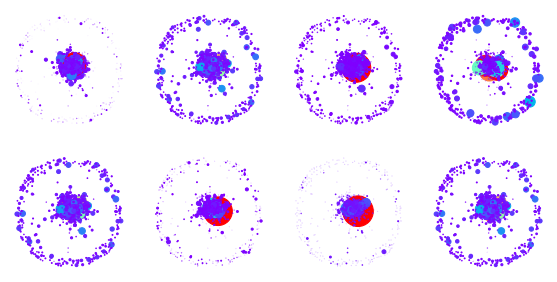

In [35]:
plt.close('all')
fig, axs = plt.subplots(2,4, figsize=( 1.5 * 6.4, 1.0 * 4.8))#,dpi = 300)

# fig.patch.set_facecolor('silver')
default_node_size = 0.0
scaling_factor = 10.0
alpha_factor  = 1.0
cmap_all = plt.cm.rainbow#Reds #BuGn#rainbow#

data = [top_1000_betwc_normalized, 
        top_1000_degc_normalized, 
        top_1000_pagerank_normalized, 
        top_1000_tff_normalized, 
        top_1000_a_score_normalized, 
        top_1000_retweet_impact_normalized, 
        top_1000_mention_impact_normalized, 
        top_1000_eigc_normalized
       ]

for ax, datai in zip(axs.flatten(), data):
    ax.axis('off')
    nx.draw_networkx_nodes(
        G_social,
        pos,
        nodelist = list(top_1000_nodes),
        node_size = datai,
        node_color = datai,
        cmap= cmap_all,
        alpha = alpha_factor,
        ax = ax
    )

fig.savefig('./plots/measures_graph_horizontal_rainbow.png', dpi = 300,facecolor=fig.get_facecolor())

In [36]:
# adjacency matrix for start

In [37]:
import scipy.sparse as sparse

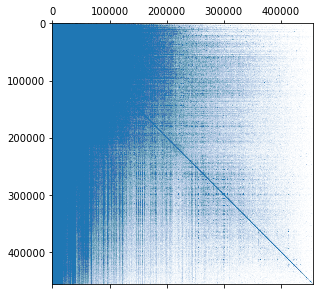

In [38]:
start = time.time()

fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8))
ax.spy(nx.adjacency_matrix(G_social), markersize =0.01, marker = '.')

fig.savefig('./plots/adj_matr.png', dpi = 300)

In [39]:
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')
# prev Runtime 
# 368.95525789260864 seconds
# 6.149254298210144 min

284.1270785331726 seconds
4.73545130888621 min


In [40]:
# correlation studies

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


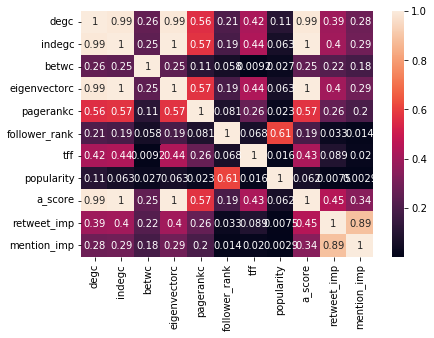

In [41]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)

# correlation matrix
corr_matr = df_social_centralities.drop(columns = 'nodeId').corr()
sns.heatmap(corr_matr, annot = True)
fig.savefig('./plots/corr_pearson.png',dpi=300)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


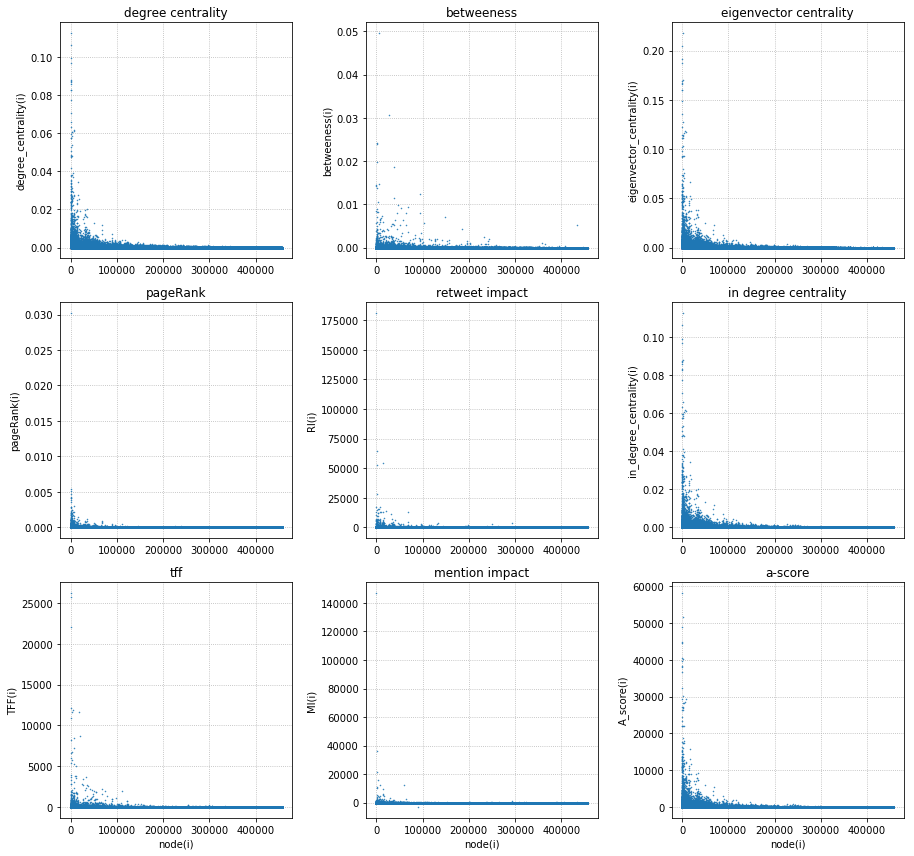

In [42]:
plt.close('all')
fig, axs = plt.subplots(3,3, figsize=(2* 6.4, 2.5*4.8), tight_layout = True)#,dpi = 300)
for i in axs: 
    for j in i: 
        j.grid(ls= ':')
axs[2][0].set_xlabel('node(i)')
axs[2][1].set_xlabel('node(i)')
axs[2][2].set_xlabel('node(i)')

ylabels = ['degree_centrality(i)',
           'betweeness(i)',
           'eigenvector_centrality(i)',
           'pageRank(i)',
           'RI(i)',
           'in_degree_centrality(i)', 
           'TFF(i)', 
           'MI(i)', 
           'A_score(i)']
titles = ['degree centrality',
          'betweeness' ,
          'eigenvector centrality',
          'pageRank',
          'retweet impact',
          'in degree centrality', 
          'tff', 
          'mention impact',
          'a-score']

dfcolumns = ['degc', 
            'betwc', 
            'eigenvectorc', 
            'pagerankc', 
            'retweet_imp',
            'indegc',
            'tff',
            'mention_imp',
            'a_score']
point_size = 1.0

for ax, ylabel, title, dfcolumn in zip(axs.flatten(), ylabels, titles, dfcolumns):
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.plot(df_social_centralities.nodeId, df_social_centralities[dfcolumn], '.' , markersize = point_size)
fig.savefig('./plots/measures_all_nodes.png', dpi = 300)

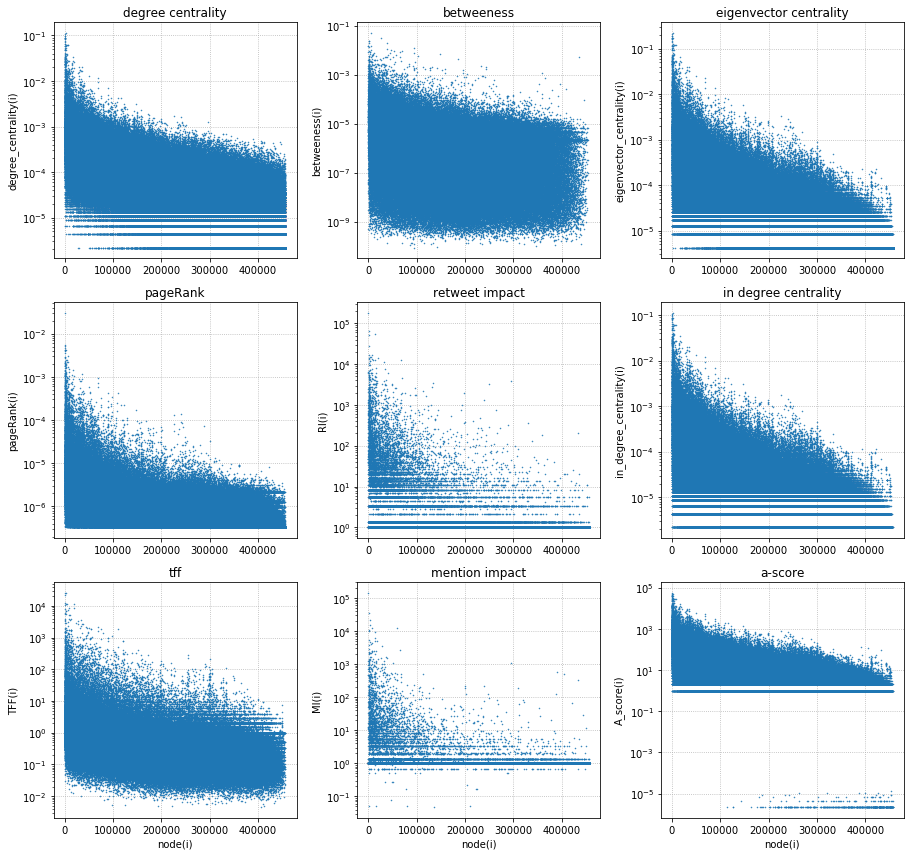

In [43]:
plt.close('all')
fig, axs = plt.subplots(3,3, figsize=(2* 6.4, 2.5*4.8), tight_layout = True)#,dpi = 300)
for i in axs: 
    for j in i: 
        j.grid(ls= ':')
axs[2][0].set_xlabel('node(i)')
axs[2][1].set_xlabel('node(i)')
axs[2][2].set_xlabel('node(i)')

ylabels = ['degree_centrality(i)',
           'betweeness(i)',
           'eigenvector_centrality(i)',
           'pageRank(i)',
           'RI(i)',
           'in_degree_centrality(i)', 
           'TFF(i)', 
           'MI(i)', 
           'A_score(i)']
titles = ['degree centrality',
          'betweeness' ,
          'eigenvector centrality',
          'pageRank',
          'retweet impact',
          'in degree centrality', 
          'tff', 
          'mention impact',
          'a-score']

dfcolumns = ['degc', 
            'betwc', 
            'eigenvectorc', 
            'pagerankc', 
            'retweet_imp',
            'indegc',
            'tff',
            'mention_imp',
            'a_score']
point_size = 1.0

for ax, ylabel, title, dfcolumn in zip(axs.flatten(), ylabels, titles, dfcolumns):
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.semilogy(df_social_centralities.nodeId, df_social_centralities[dfcolumn], '.' , markersize = point_size)
fig.savefig('./plots/measures_all_nodes_semilogy.png', dpi = 300)

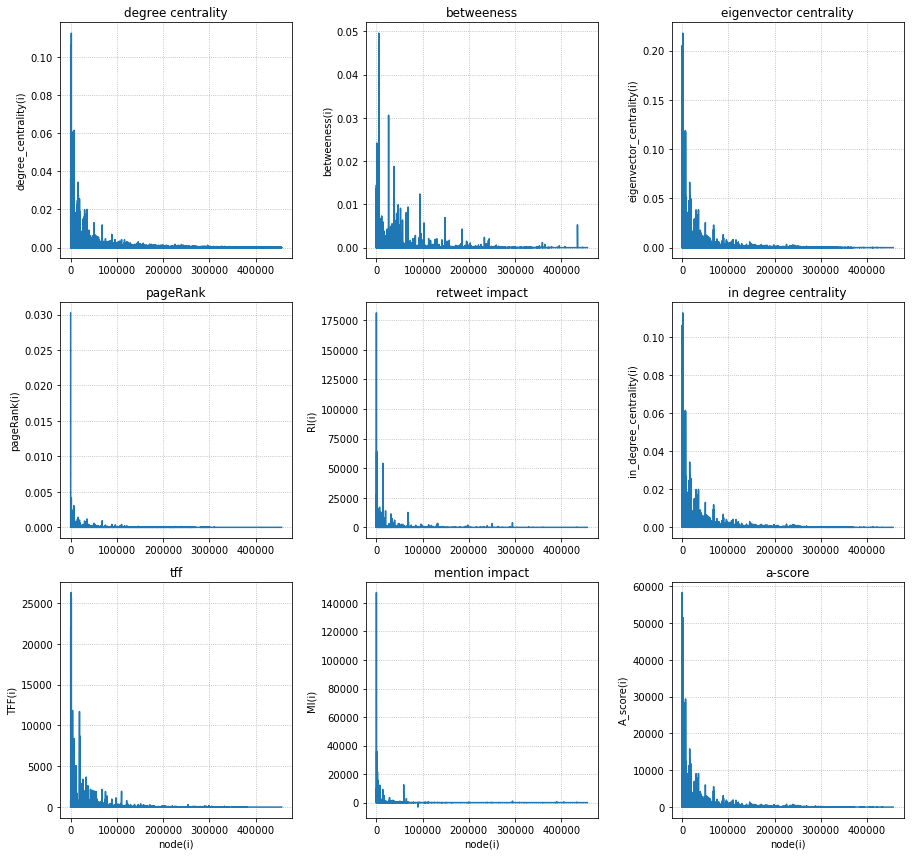

In [44]:
plt.close('all')
fig, axs = plt.subplots(3,3, figsize=(2* 6.4, 2.5*4.8), tight_layout = True)#,dpi = 300)
for i in axs: 
    for j in i: 
        j.grid(ls= ':')
axs[2][0].set_xlabel('node(i)')
axs[2][1].set_xlabel('node(i)')
axs[2][2].set_xlabel('node(i)')

ylabels = ['degree_centrality(i)',
           'betweeness(i)',
           'eigenvector_centrality(i)',
           'pageRank(i)',
           'RI(i)',
           'in_degree_centrality(i)', 
           'TFF(i)', 
           'MI(i)', 
           'A_score(i)']
titles = ['degree centrality',
          'betweeness' ,
          'eigenvector centrality',
          'pageRank',
          'retweet impact',
          'in degree centrality', 
          'tff', 
          'mention impact',
          'a-score']

dfcolumns = ['degc', 
            'betwc', 
            'eigenvectorc', 
            'pagerankc', 
            'retweet_imp',
            'indegc',
            'tff',
            'mention_imp',
            'a_score']
point_size = 1.0

for ax, ylabel, title, dfcolumn in zip(axs.flatten(), ylabels, titles, dfcolumns):
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.plot(df_social_centralities.nodeId, df_social_centralities[dfcolumn], '-' , markersize = point_size)
fig.savefig('./plots/measures_all_nodes_lines.png', dpi = 300)

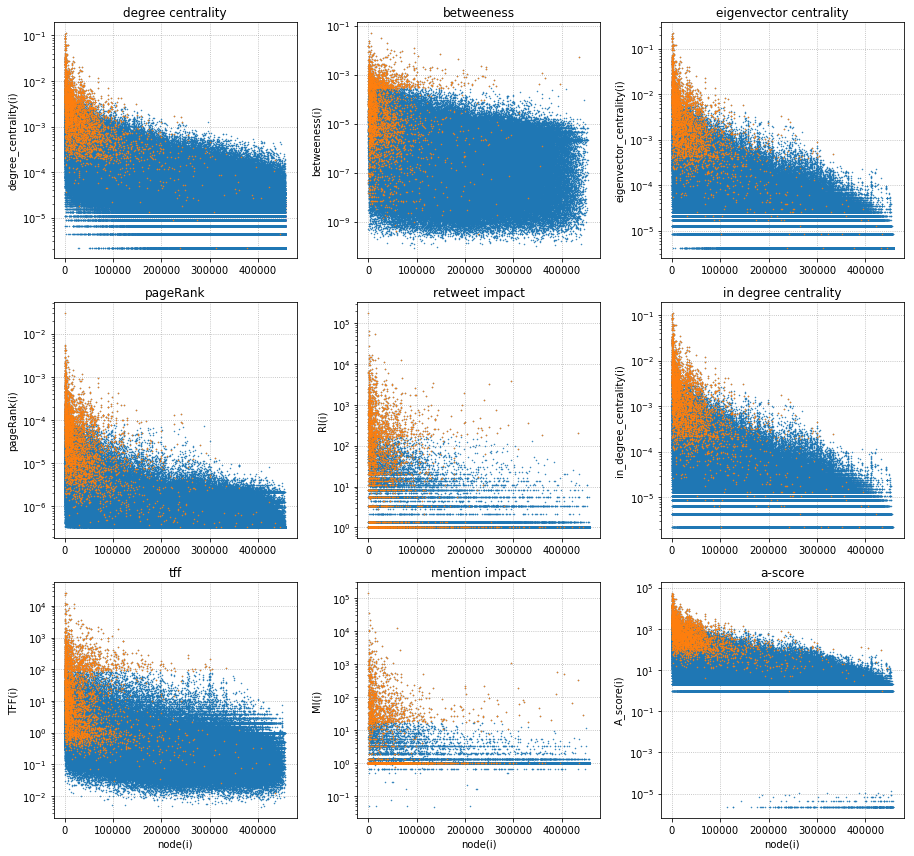

In [45]:
plt.close('all')
fig, axs = plt.subplots(3,3, figsize=(2* 6.4, 2.5*4.8), tight_layout = True)#,dpi = 300)
for i in axs: 
    for j in i: 
        j.grid(ls= ':')
axs[2][0].set_xlabel('node(i)')
axs[2][1].set_xlabel('node(i)')
axs[2][2].set_xlabel('node(i)')

ylabels = ['degree_centrality(i)',
           'betweeness(i)',
           'eigenvector_centrality(i)',
           'pageRank(i)',
           'RI(i)',
           'in_degree_centrality(i)', 
           'TFF(i)', 
           'MI(i)', 
           'A_score(i)']
titles = ['degree centrality',
          'betweeness' ,
          'eigenvector centrality',
          'pageRank',
          'retweet impact',
          'in degree centrality', 
          'tff', 
          'mention impact',
          'a-score']

dfcolumns = ['degc', 
            'betwc', 
            'eigenvectorc', 
            'pagerankc', 
            'retweet_imp',
            'indegc',
            'tff',
            'mention_imp',
            'a_score']
point_size = 1.0

for ax, ylabel, title, dfcolumn in zip(axs.flatten(), ylabels, titles, dfcolumns):
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.semilogy(df_social_centralities.nodeId, df_social_centralities[dfcolumn], '.' , markersize = point_size)
axs[0][0].semilogy(top_1000_nodes, [degc_dict[node] for node in list(top_1000_nodes)], '.' , markersize = point_size)
axs[0][1].semilogy(top_1000_nodes, [betweeness_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[0][2].semilogy(top_1000_nodes, [eigenvector_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[1][0].semilogy(top_1000_nodes, [pagerank_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[1][1].semilogy(top_1000_nodes, [retweet_impact_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[1][2].semilogy(top_1000_nodes, [in_degc_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[2][0].semilogy(top_1000_nodes, [tff_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[2][1].semilogy(top_1000_nodes, [mention_impact_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)
axs[2][2].semilogy(top_1000_nodes, [a_score_dict[node] for node in list(top_1000_nodes)], '.', markersize = point_size)

fig.savefig('./plots/measures_all_nodes_semilogy_and_top_nodes.png', dpi = 300)

In [46]:
# # ALL MEASURES SCATTER PLOTS dpi 300
# start = time.time()

# point_size = 1.0
# for x_measure in list(df_social_centralities.keys()):
#     plt.close('all')
#     fig, axs = plt.subplots(3,4, figsize=( 3.0 * 6.4, 2.0 * 4.8), tight_layout = True)#,dpi = 300)
    
#     for axi, centr_measure in zip(axs.flatten(), list(df_social_centralities.keys())):
#         axi.loglog(df_social_centralities[x_measure], df_social_centralities[centr_measure], '.', markersize = point_size)
#         axi.set_xlabel(x_measure)
#         axi.set_ylabel(centr_measure)
#         axi.grid(ls = ':')
#     fig.savefig(f'./plots/correlations_between_measures/loglogplots/all_measures_corr_loglog_{x_measure}_dpi300.png', dpi = 300)
# end = time.time()
# print(f'{end - start} seconds')
# print(f'{(end - start)/60.} min')

In [47]:
# # ALL MEASURES SCATTER PLOTS dpi 100
# plt.close('all')
# start = time.time()

# point_size = 1.0
# for x_measure in list(df_social_centralities.keys()):
#     plt.close('all')
#     fig, axs = plt.subplots(3,4, figsize=( 3.0 * 6.4, 2.0 * 4.8), tight_layout = True)#,dpi = 300)
    
#     for axi, centr_measure in zip(axs.flatten(), list(df_social_centralities.keys())):
#         axi.loglog(df_social_centralities[x_measure], df_social_centralities[centr_measure], '.', markersize = point_size)
#         axi.set_xlabel(x_measure)
#         axi.set_ylabel(centr_measure)
#         axi.grid(ls = ':')
#     fig.savefig(f'./plots/correlations_between_measures/loglogplots/all_measures_corr_loglog_{x_measure}_dpi100.png', dpi = 300)
# end = time.time()
# print(f'{end - start} seconds')
# print(f'{(end - start)/60.} min')

In [48]:
df_social_centralities.keys()

Index(['nodeId', 'degc', 'indegc', 'betwc', 'eigenvectorc', 'pagerankc',
       'follower_rank', 'tff', 'popularity', 'a_score', 'retweet_imp',
       'mention_imp'],
      dtype='object')

40.62917184829712 seconds
0.6771528641382853 min


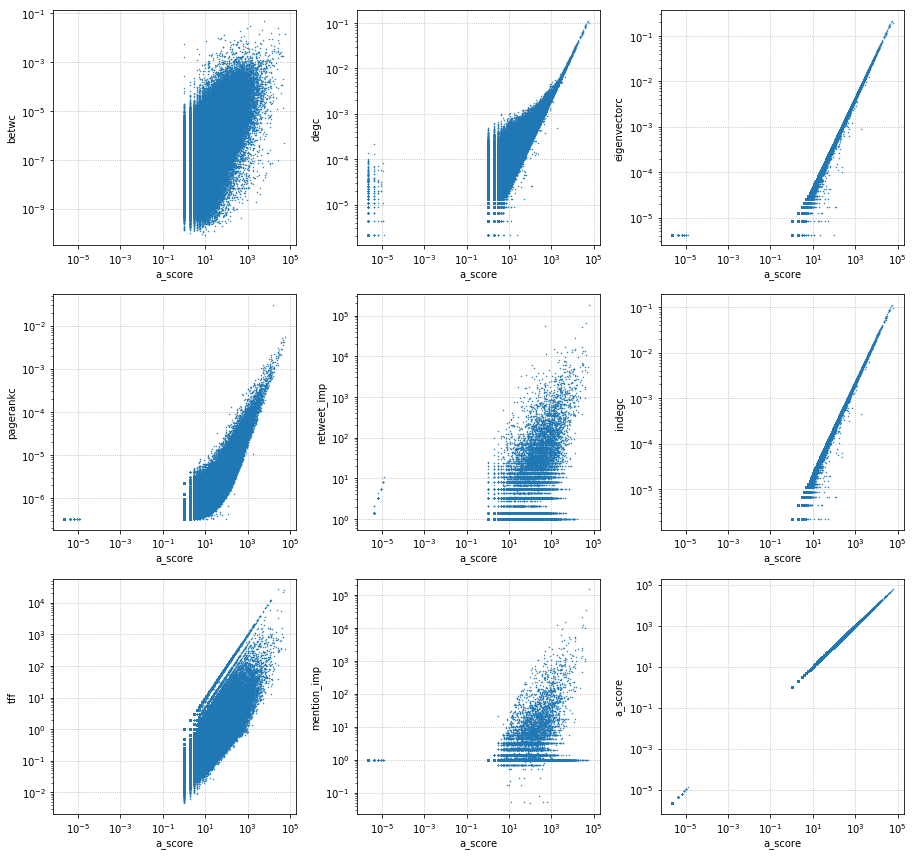

In [49]:
start = time.time()
list_of_keys = ['betwc', 'degc', 'eigenvectorc', 'pagerankc','retweet_imp', 'indegc','tff','mention_imp', 'a_score']
point_size = 1.0
for x_measure in list_of_keys:
    plt.close('all')
    fig, axs = plt.subplots(3,3, figsize=(2* 6.4, 2.5*4.8), tight_layout = True)#,dpi = 300)
        
    for axi, centr_measure in zip(axs.flatten(), list_of_keys):
        axi.loglog(df_social_centralities[x_measure], df_social_centralities[centr_measure], '.', markersize = point_size)
        axi.set_xlabel(x_measure)
        axi.set_ylabel(centr_measure)
        axi.grid(ls = ':')
    fig.savefig(f'./plots/correlations_between_measures/subset_measures_corr_loglog_{x_measure}.png', format="png",dpi = 100)
end = time.time()
print(f'{end - start} seconds')
print(f'{(end - start)/60.} min')

In [50]:
# correlation matrix
corr_matr = df_social_centralities.drop(columns = 'nodeId').corr('pearson')
corr_matr

,degc,indegc,betwc,eigenvectorc,pagerankc,follower_rank,tff,popularity,a_score,retweet_imp,mention_imp
degc,1.000000,0.990724,0.257425,0.990724,0.561150,0.206692,0.421347,0.105945,0.988801,0.393224,0.283240
indegc,0.990724,1.000000,0.246287,1.000000,0.573312,0.193198,0.435057,0.062873,0.998348,0.401973,0.290364
betwc,0.257425,0.246287,1.000000,0.246287,0.114189,0.057511,0.009230,0.027160,0.252330,0.222105,0.184959
eigenvectorc,0.990724,1.000000,0.246287,1.000000,0.573312,0.193198,0.435057,0.062873,0.998348,0.401973,0.290364
pagerankc,0.561150,0.573312,0.114189,0.573312,1.000000,0.081174,0.264453,0.022987,0.573846,0.260098,0.196409
follower_rank,0.206692,0.193198,0.057511,0.193198,0.081174,1.000000,0.067651,0.611903,0.190354,0.032787,0.014357
tff,0.421347,0.435057,0.009230,0.435057,0.264453,0.067651,1.000000,0.015529,0.426940,0.088661,0.019867
popularity,0.105945,0.062873,0.027160,0.062873,0.022987,0.611903,0.015529,1.000000,0.061853,0.007472,0.002941
a_score,0.988801,0.998348,0.252330,0.998348,0.573846,0.190354,0.426940,0.061853,1.000000,0.447582,0.343474
retweet_imp,0.393224,0.401973,0.222105,0.401973,0.260098,0.032787,0.088661,0.007472,0.447582,1.000000,0.889266


C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


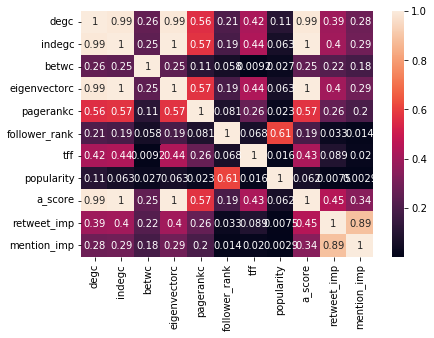

In [51]:
import seaborn as sns
plt.close('all')
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)

sns.heatmap(corr_matr, annot = True)
fig.savefig('./plots/corr_pearson.png',dpi=300)

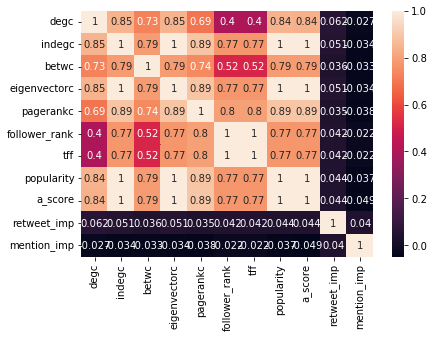

In [52]:
plt.close('all')
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)

# correlation matrix
corr_matr = df_social_centralities.drop(columns = 'nodeId').corr('spearman')
sns.heatmap(corr_matr, annot = True)
fig.savefig('./plots/corr_spearman.png',dpi=300)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


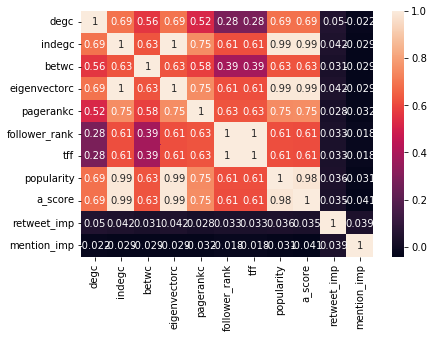

In [53]:
plt.close('all')
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)

# correlation matrix
corr_matr = df_social_centralities.drop(columns = 'nodeId').corr('kendall')
sns.heatmap(corr_matr, annot = True)
fig.savefig('./plots/corr_kendall.png',dpi=300)

In [54]:
# linear relationships

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


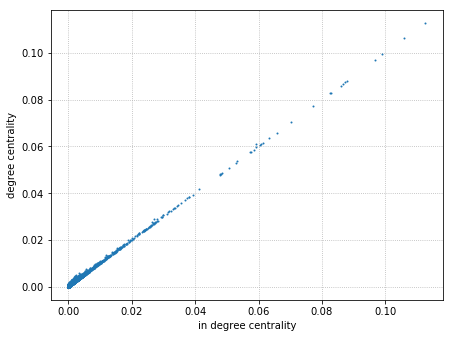

In [55]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.indegc, df_social_centralities.degc, 'o', markersize = point_size)
axs.set_xlabel('in degree centrality')
axs.set_ylabel('degree centrality')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/deg_vs_indeg.png', format="png",dpi = 100)

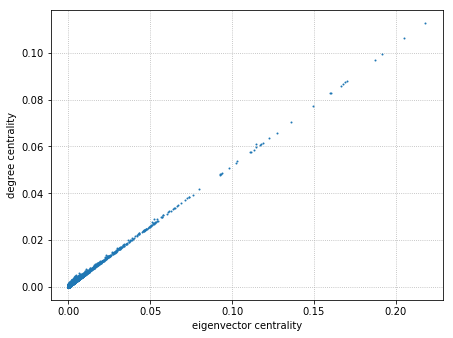

In [56]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.eigenvectorc, df_social_centralities.degc, 'o', markersize = point_size)
axs.set_xlabel('eigenvector centrality')
axs.set_ylabel('degree centrality')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/deg_vs_eigen.png', format="png",dpi = 100)

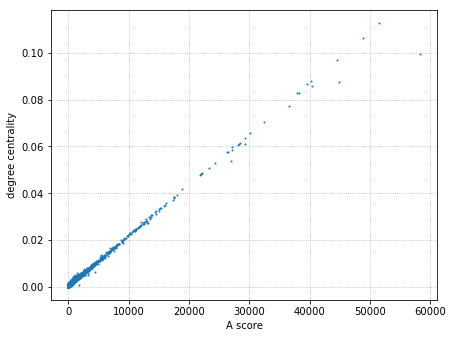

In [57]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.a_score, df_social_centralities.degc, 'o', markersize = point_size)
axs.set_xlabel('A score')
axs.set_ylabel('degree centrality')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/deg_vs_Ascore.png', format="png",dpi = 100)

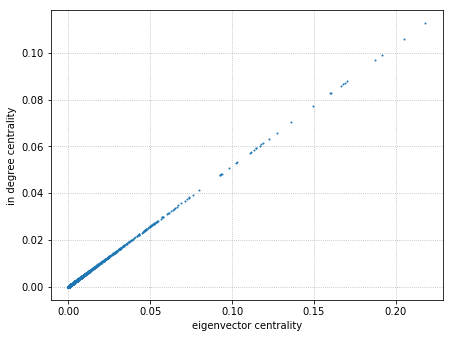

In [58]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.eigenvectorc, df_social_centralities.indegc, 'o', markersize = point_size)
axs.set_xlabel('eigenvector centrality')
axs.set_ylabel('in degree centrality')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/indeg_vs_eigen.png', format="png",dpi = 100)

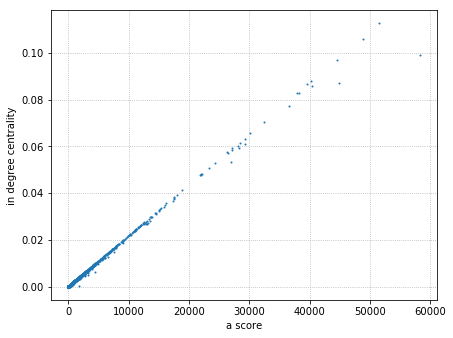

In [59]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.a_score, df_social_centralities.indegc, 'o', markersize = point_size)
axs.set_xlabel('a score')
axs.set_ylabel('in degree centrality')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/indeg_vs_Ascore.png', format="png",dpi = 100)

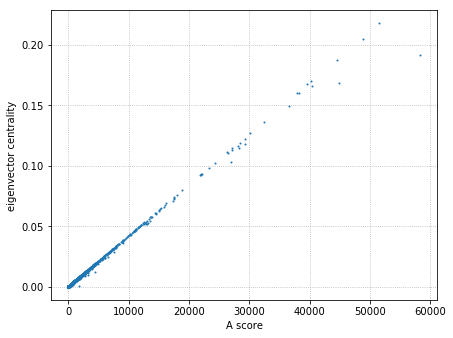

In [60]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.a_score, df_social_centralities.eigenvectorc, 'o', markersize = point_size)
axs.set_xlabel('A score')
axs.set_ylabel('eigenvector centrality')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/eigenvector_vs_Ascore.png', format="png",dpi = 100)

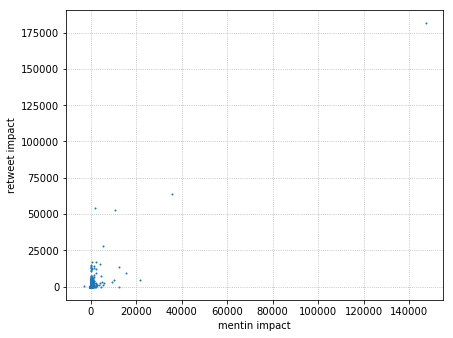

In [61]:
point_size = 1.0
plt.close('all')
fig, axs = plt.subplots(1,1, figsize=(6.4, 4.8), tight_layout = True)#,dpi = 300)
       
axs.plot(df_social_centralities.mention_imp, df_social_centralities.retweet_imp, 'o', markersize = point_size)
axs.set_xlabel('mentin impact')
axs.set_ylabel('retweet impact')
axs.grid(ls = ':')
fig.savefig('./plots/correlations_between_measures/single_plots/RI_vs_MI.png', format="png",dpi = 100)

In [62]:
# comparison between spearman and kendall correlation coefficients

In [63]:
corr_matr_spearman = df_social_centralities.drop(columns = 'nodeId').corr('spearman')
corr_matr_kendall = df_social_centralities.drop(columns = 'nodeId').corr('kendall')

In [64]:
corr_matr_spearman.keys()

Index(['degc', 'indegc', 'betwc', 'eigenvectorc', 'pagerankc', 'follower_rank',
       'tff', 'popularity', 'a_score', 'retweet_imp', 'mention_imp'],
      dtype='object')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axe

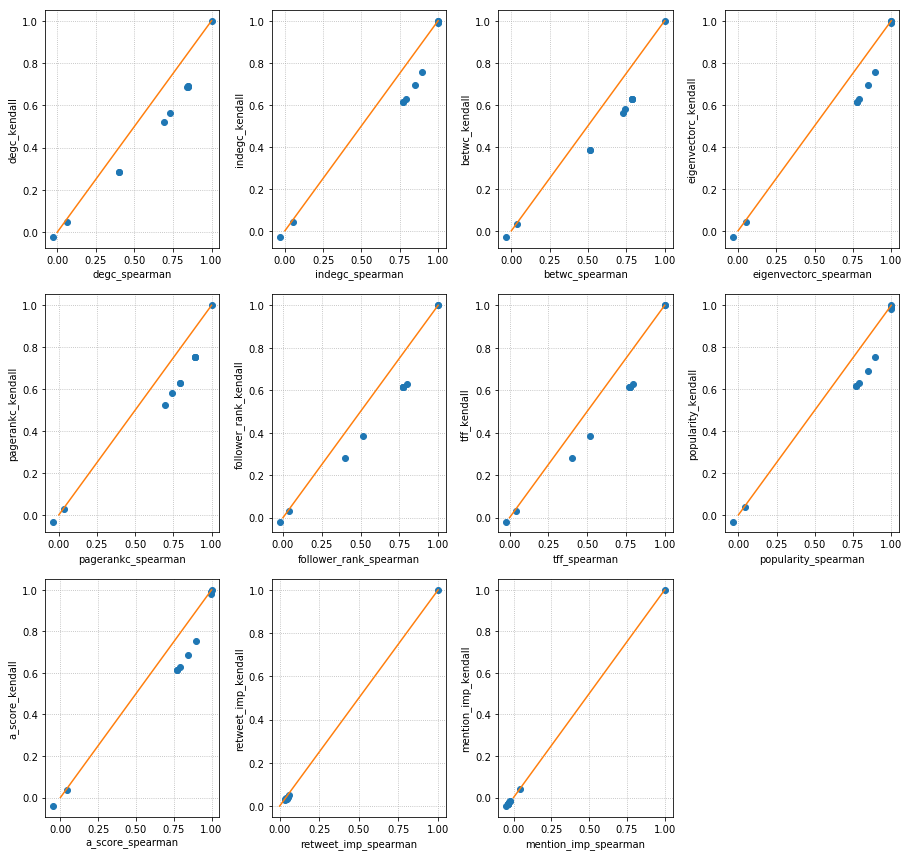

In [65]:
fig, axs = plt.subplots(3,4, figsize=(2* 6.4, 2.5*4.8), tight_layout = True)#,dpi = 300)

x = np.linspace(0,1)

for ax, key in zip(axs.flatten(),corr_matr_spearman.keys()):
    ax.plot(corr_matr_spearman[key], corr_matr_kendall[key], 'o')
    ax.plot(x,x)
    ax.set_xlabel(key+'_spearman')
    ax.set_ylabel(key+'_kendall')
    ax.grid(ls = ':')
axs[2][3].axis('off')
fig.savefig('./plots/correlations_between_measures/kendall_vs_spearman.png', dpi = 300)
fig.savefig('./plots/correlations_between_measures/kendall_vs_spearman_dpi100.png', dpi = 100)